# Sample Diagrams

The aim of this notebook is to provide sample codes creating diagrams.

In [1]:
import numpy as np
import scipy.stats as stats
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from IPython.display import display, HTML
plt.style.use("fivethirtyeight")

from pylab import rcParams
rcParams['figure.figsize'] = 14, 6

In [3]:
try:
    from adhoc.processing import Inspector
    from adhoc.modeling import show_tree
    from adhoc.utilities import load_iris, facet_grid_scatter_plot, bins_heatmap
except ImportError:
    import sys
    sys.path.append("..")
    from adhoc.processing import Inspector
    from adhoc.modeling import show_tree
    from adhoc.utilities import load_iris, facet_grid_scatter_plot, bins_heatmap

In [4]:
np.random.seed(1)

df = load_iris(target="species")
df["cat1"] = np.random.choice(["a","b","c"], size=df.shape[0], replace=True)
df["cat2"] = (df.iloc[:,0]*df.iloc[:,1] - df.iloc[:,2]*df.iloc[:,3] > 11).map({True:1,False:0})

inspector = Inspector(df)
inspector ## 4 continuous variables and 3 categorical variables

,dtype,count_na,rate_na,n_unique,distinct,variable,sample_value
sepal_length,float64,0,0.0,35,False,continuous,6.6
sepal_width,float64,0,0.0,23,False,continuous,2.6
petal_length,float64,0,0.0,43,False,continuous,4.3
petal_width,float64,0,0.0,22,False,continuous,0.6
species,object,0,0.0,3,False,categorical,versicolor
cat1,object,0,0.0,3,False,categorical,a
cat2,int64,0,0.0,2,False,binary,1


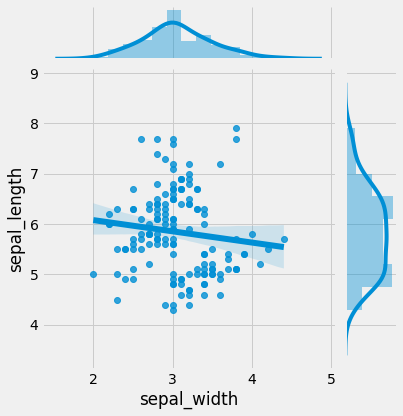

In [5]:
inspector.visualize_two_fields("sepal_width","sepal_length") ## continuous x continuous

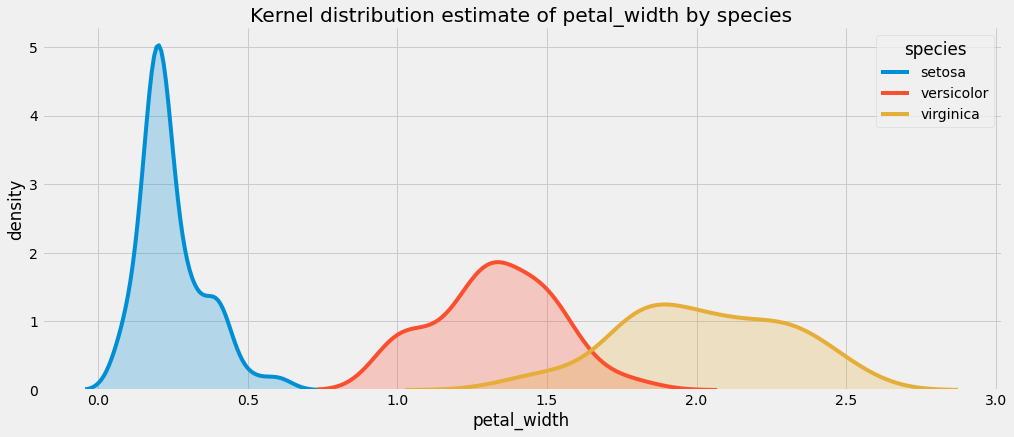

In [6]:
inspector.visualize_two_fields("petal_width","species") ## continuous x categorical

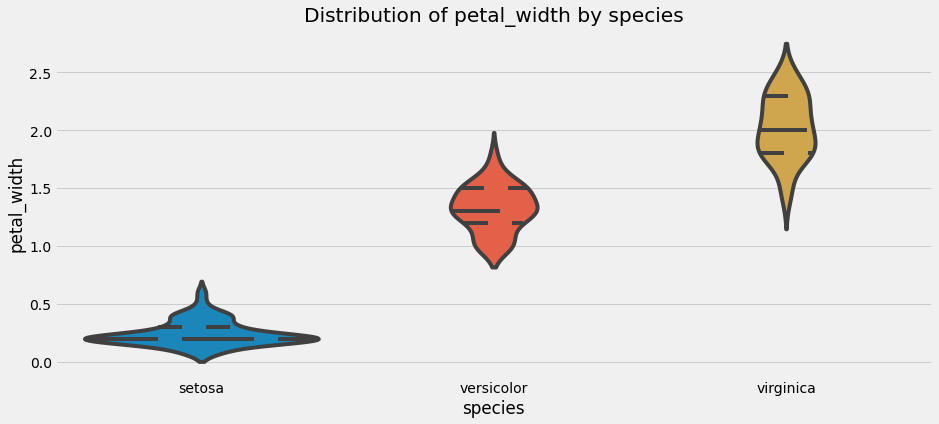

In [7]:
inspector.visualize_two_fields("species","petal_width") ## categorical x continuous

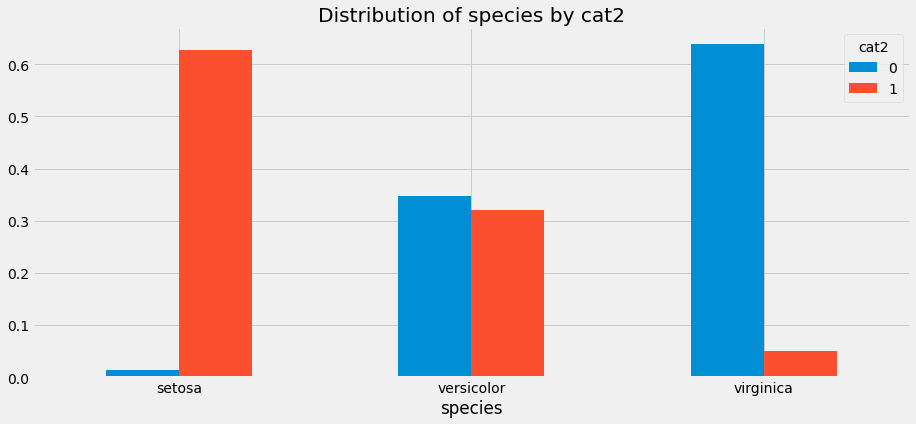

In [8]:
inspector.visualize_two_fields("species","cat2")

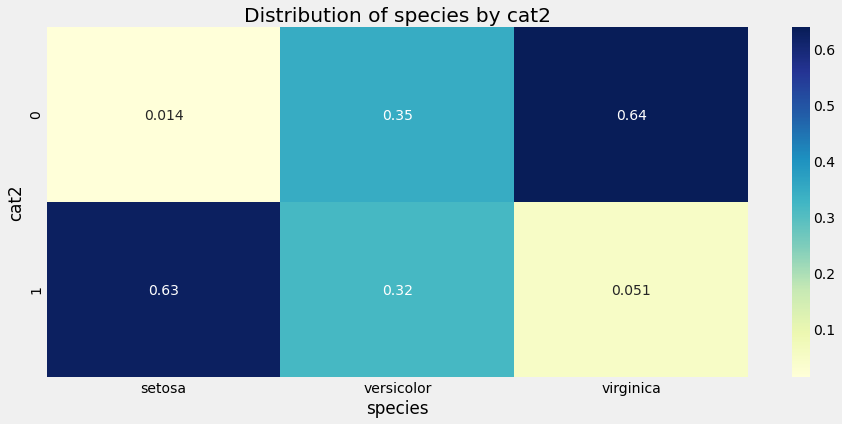

In [9]:
inspector.visualize_two_fields("species", "cat2", heatmap=True)

In [10]:
from sklearn.tree import DecisionTreeClassifier
features = ["sepal_length","sepal_width","petal_length","petal_width","cat2"]

tree = DecisionTreeClassifier(max_depth=3, random_state=4)
tree.fit(df[features],df["species"]);

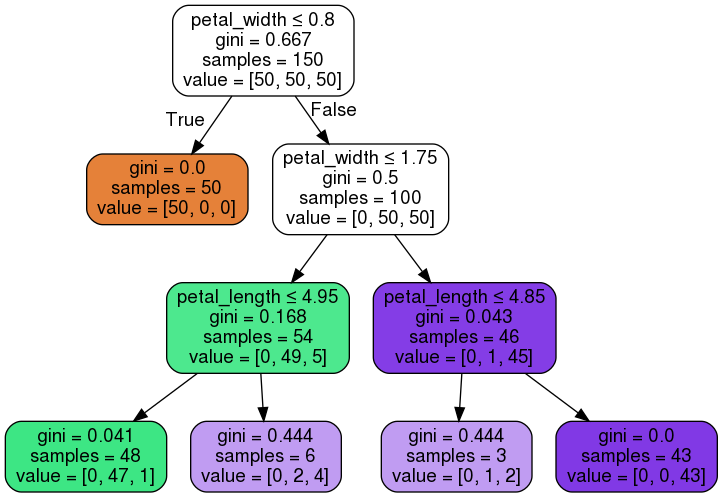

In [11]:
show_tree(tree, columns=features)

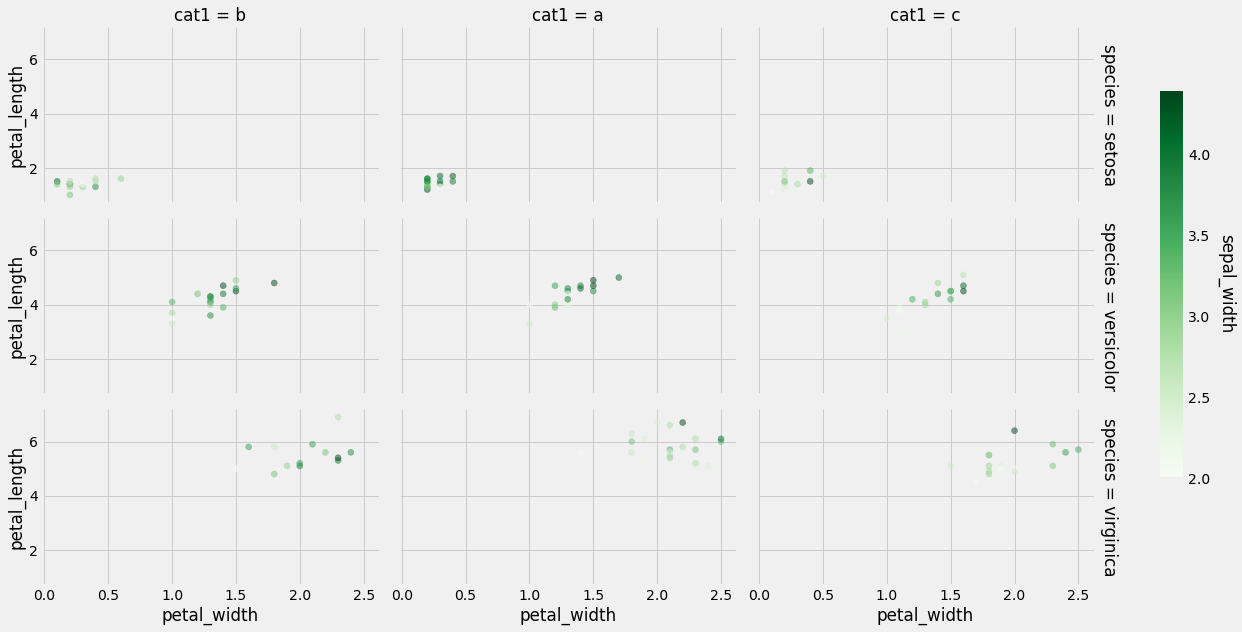

In [12]:
facet_grid_scatter_plot(df, row="species", col="cat1", 
                        x="petal_width", y="petal_length", 
                        c="sepal_width", cmap="Greens")

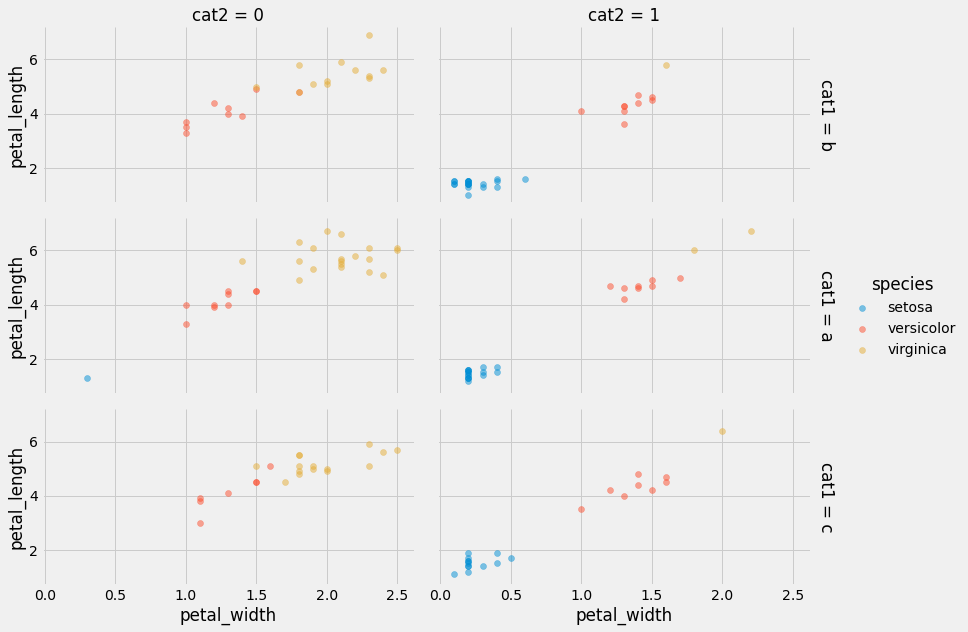

In [13]:
facet_grid_scatter_plot(df, row="cat1", col="cat2", 
                        x="petal_width", y="petal_length", hue="species")

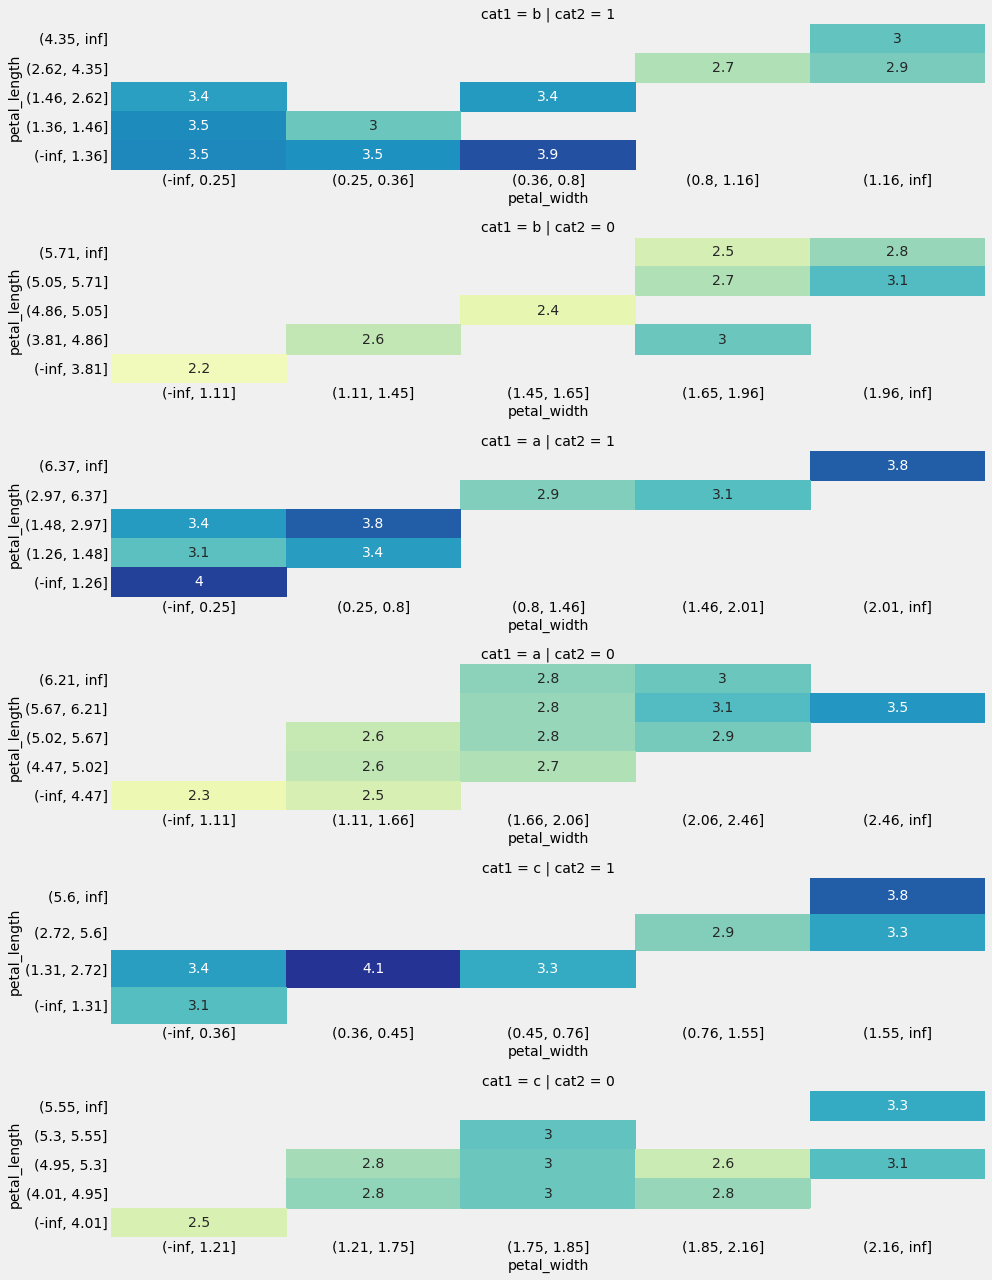

In [14]:
bins_heatmap(df, cat1="cat1", cat2="cat2", x="petal_width", y="petal_length",
             target="sepal_width", fontsize=14)

## Envirmediant

In [15]:
%load_ext watermark
%watermark -v -n -m -p numpy,scipy,sklearn,pandas,matplotlib,seaborn

Tue Mar 31 2020 

CPython 3.7.0
IPython 7.13.0

numpy 1.18.0
scipy 1.2.3
sklearn 0.22.2
pandas 1.0.0
matplotlib 3.2.1
seaborn 0.10.0

compiler   : GCC 7.2.0
system     : Linux
release    : 4.12.14-lp150.12.82-default
machine    : x86_64
processor  : x86_64
CPU cores  : 8
interpreter: 64bit
